In [19]:
import requests
import jsonpickle
url = 'http://127.0.0.1:10001/extract-frames'
files = {'video': open('../data/Tae.mp4', 'rb')}
data = {'fps_max':10, 'width_max':640, 'height_max': 480}
response = requests.post(url, files=files, data=data)
response = jsonpickle.decode(response.text)

frames = response['frames']
metadata = response['metadata']

In [20]:
metadata

{'num_frames_original': 68,
 'num_frames': 12,
 'duration_seconds': 1.1333333333333333,
 'fps_original': 60.0,
 'fps': 10.588235294117647,
 'width_original': 1920,
 'height_original': 1080,
 'width': 640,
 'height': 360,
 'frame_idx_original': [0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66]}

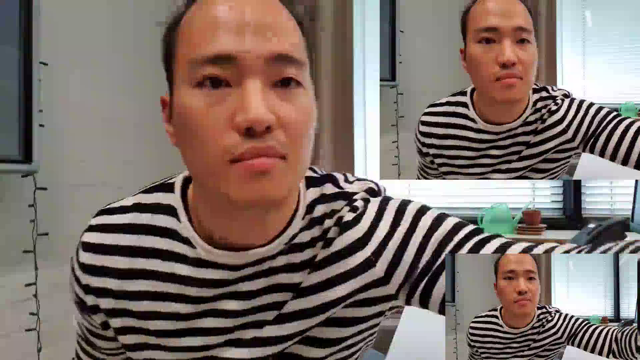

In [24]:
frames[3]